Air video

frame # 320

In [1]:
import numpy as np
import cv2
framerate = 29.18

In [ ]:
!cd "D:/Interfacial waves resonance videos/0404"


vidcap = cv2.VideoCapture('air/air.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("air/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', count )
  count += 1

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Water video

In [3]:
%cd "D:Interfacial waves resonance videos/0404"

D:\Interfacial waves resonance videos\0404


In [ ]:
vidcap = cv2.VideoCapture('water.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("water/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', count )
  count += 1

Steady interface, salt:


In [ ]:
vidcap = cv2.VideoCapture('water/water.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("steady_after/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', count )
  count += 1

In [ ]:
vidcap = cv2.VideoCapture('wave/wave.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("wave/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', count )
  count += 1

In [ ]:
% cd 0404/

Cutting out the relevant part

In [4]:
import cv2
#air = cv2.flip(cv2.imread("air/frame500.jpg", cv2.IMREAD_GRAYSCALE), -1)
water = cv2.flip(cv2.imread("water/frame100.jpg", cv2.IMREAD_GRAYSCALE), -1)
img = cv2.flip(cv2.imread("wave/frame500.jpg", cv2.IMREAD_GRAYSCALE), -1)

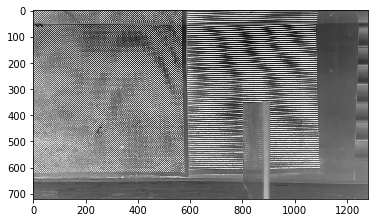

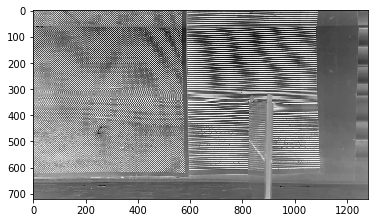

In [5]:
plt.imshow(water, cmap='Greys')
plt.show()
plt.imshow(img, cmap='Greys')

In [6]:
#img = cv2.flip(cv2.imread("wave/frame300.jpg", cv2.IMREAD_GRAYSCALE), -1)
#plt.imshow(img, cmap = 'Greys')
imgcut = img[100:600, 600:800]
refcut = water[100:600, 600:800]


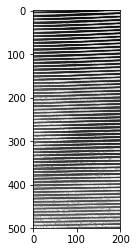

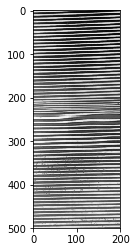

In [7]:
plt.imshow(refcut, cmap = 'Greys')
plt.show()
plt.imshow(imgcut, cmap = 'Greys')


400:600 és 1000:1200

In [ ]:
def write_frames(num):
    air = cv2.flip(cv2.imread("air/frame%s.jpg" %num, cv2.IMREAD_GRAYSCALE), -1)
    water = cv2.flip(cv2.imread("water/frame%s.jpg" %num, cv2.IMREAD_GRAYSCALE), -1)
    img = cv2.flip(cv2.imread("salt/frame%s.jpg" %num, cv2.IMREAD_GRAYSCALE), -1)
    cv2.imwrite("air.tif", air)     # save frame as JPEG file      
    cv2.imwrite("water.tif", water)
    cv2.imwrite("salt.tif", img)     # save frame as JPEG file      


In [ ]:
img = cv2.flip(cv2.imread("wave/frame5760.jpg", cv2.IMREAD_GRAYSCALE), -1)
cv2.imwrite("wave.tif", img)     # save frame as JPEG file      


In [ ]:
write_frames(400)

## Line counting

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
refref = refcut[:, 100]
imgref = imgcut[:, 100]

peaksimg, _ = find_peaks(255.-imgref, height=125)
peaks, _ = find_peaks(255.-refref, height=125)

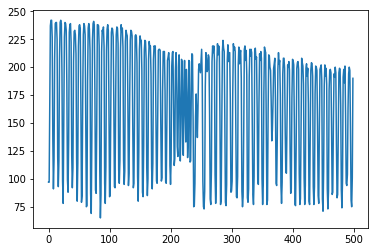

In [9]:
#xplt.plot(refref)
plt.plot(imgref)

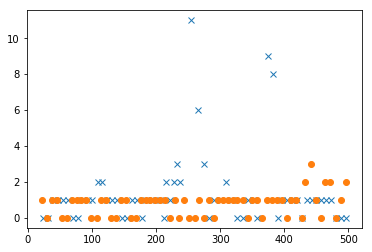

In [10]:
plt.plot(peaksimg[2:], np.abs(np.diff(np.diff(peaksimg))), "x")
plt.plot(peaks[2:], np.abs(np.diff(np.diff(peaks))), "o")

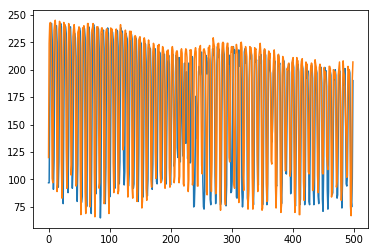

In [11]:
plt.plot(imgref)
plt.plot(refref)

In [ ]:
def printMaxAmpl(img, ref, col):
    img = img[150:600, 600:800]
    #ref = ref[180:550, 600:700]
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img = clahe.apply(img)
    imgref = img[:,col]
    refref = refcut[:,col]
    peaksimg, _ = find_peaks(255.-imgref, height=200)
    peaks, _ = find_peaks(255.-refref, height=125)
    shorter =  np.min([len(peaksimg), len(peaks)])
    peaksimgcut = peaksimg[:shorter]
    peakscut = peaks[:shorter]
    maxplace = np.argmax(np.abs(np.diff(np.diff(peaksimgcut)) - np.diff(np.diff(peakscut))))
    return [maxplace, np.max(np.abs(np.diff(np.diff(peaksimgcut)) - np.diff(np.diff(peakscut))))]

In [ ]:

import openpiv.validation
import openpiv.filters
import openpiv.scaling
import scipy
import openpiv.tools
import openpiv.process
import openpiv.scaling

In [12]:

def printMaxAmpl(img, ref, col):
    img = img[100:600, 600:800]
    #ref = ref[180:550, 600:700]
    cv2.equalizeHist(img)

    imgref = img[:,col]
    refref = ref[:,col]
    peaksimg, _ = find_peaks(255.-imgref, height=150)
    peaks, _ = find_peaks(255.-refref, height=150)
    shorter =  np.min([len(peaksimg), len(peaks)])
    peaksimgcut = peaksimg[:shorter]
    peakscut = peaks[:shorter]
    maxplace = np.argmax(np.abs(np.diff(np.diff(peaksimgcut)) - np.diff(np.diff(peakscut))))
    return [maxplace, np.max(np.abs(np.diff(np.diff(peaksimgcut)) - np.diff(np.diff(peakscut))))]

In [13]:
def read_file(src):
    img = cv2.flip(cv2.imread(src, cv2.IMREAD_GRAYSCALE), -1)
    return img

In [ ]:
from scipy import signal
ampls = []
for i in range(0, 37558):
    #print(i)
    img = read_file("wave/frame%s.jpg" %i)
    amplsincol = []
    #for j in range(100):
    #    amplsincol.append(printMaxAmpl(img, ref,j)[1])
        #print(printMaxAmpl(img, ref,j)[1])
    #m = np.argmax(np.array(amplsincol))
    ampls.append(printMaxAmpl(img, refcut,100)[0])

In [14]:
ampls = np.loadtxt('0404_internal_wave.txt')

In [26]:
def filterOnce(original):
    filtered = original.copy()
    avg = np.average(original)
    std = np.std(original)

    divs = np.abs(original-avg)> 3*std
    index = np.arange(0, len(original), 1)
    filtered[index[divs]] = filtered[index[divs]-1]
    print(np.sum(divs))
    return filtered

def filterUntilSmooth(original):
    filtered = original.copy()
    avg = np.average(original)
    std = np.std(original)
    div = np.abs(original-avg) > 3*std
    while(np.sum(div)>0):
        filtered = filterOnce(filtered)
        avg = np.average(filtered)
        std = np.std(filtered)
        div = np.abs(filtered-avg)> 3*std
    return filtered


windowlength = 30.*framerate ## 30 sec
indeces = np.arange(0, len(ampls), 1)
startpoints = np.arange(0, len(ampls)-int(windowlength), int(windowlength))
endpoints = np.arange(int(windowlength), len(ampls), int(windowlength))


In [ ]:
np.savetxt('0404_internal_wave.txt', ampls)

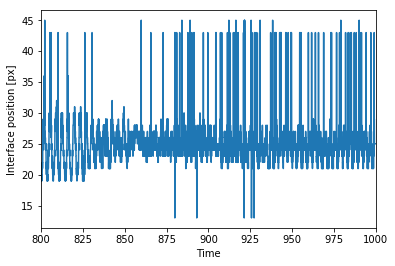

In [20]:
ampls = np.array(ampls)
plt.plot(np.arange(0, ampls.shape[0],1) /29.18, ampls)
plt.xlabel('Time')
plt.ylabel('Interface position [px]')
plt.xlim(800, 1000)
plt.show()

tr = ampls[int(800*29.18):int(1000*29.18)]

In [ ]:
plt.plot(tr)
avg = np.average(tr)
tr = np.array(tr)
div = np.abs(tr-avg)> 7
index = np.arange(0, len(tr), 1)
#div
plt.plot(index[div], tr[div], 'o')


130
32
7
11
1


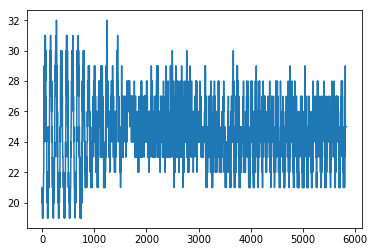

In [21]:
f = filterUntilSmooth(tr)
plt.plot(f)

In [ ]:
plt.plot(tr)

## Filtering outliers in windows of  30 sec

In [27]:
filteredAmplitudes = ampls.copy()
for i in range(len(startpoints)):
    section = ampls[startpoints[i] : endpoints[i]]
    section = filterUntilSmooth(section)
    filteredAmplitudes[startpoints[i] : endpoints[i]] = section
    

3
1
5
2
1
5
4
3
2
1
11
5
3
2
1
2
3
2
1
23
8
3
1
3
2
1
25
8
4
2
9
5
3
1
6
2
5
1
6
5
13
2
4
1
1
8
6
5
4
3
2
1
25
16
13
11
9
7
6
5
4
3
2
1
2
1
3
13
4
2
17
8
5
5
1
2
1
2
1
8
1
7
2
1
4
3
1
20
6
2
4
2
1
39
14
3
4
2
7
2
31
9
2
22
4
26
5
1
25
3
6
2
10
6
3
2
1
5
1
4
3


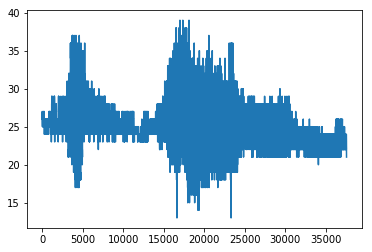

In [29]:
plt.plot(filteredAmplitudes)


In [ ]:
filtered = tr.copy()
filtered[index[div]] = filtered[index[div]-1]

In [ ]:
plt.plot(filtered)
plt.plot(index[div], filtered[index[div]], 'o')

In [ ]:
avg = np.average(filtered)
div = np.abs(filtered-avg)> 7
index = np.arange(0, len(filtered), 1)
filtered2 = filtered.copy()
filtered2[index[div]] = filtered2[index[div]-1]
plt.plot(filtered2)
plt.plot(index[div], filtered2[index[div]], 'o')

In [ ]:
avg = np.average(filtered2)
div = np.abs(filtered2-avg)> 7
index = np.arange(0, len(filtered), 1)
filtered3 = filtered2.copy()
filtered3[index[div]] = filtered3[index[div]-1]
plt.plot(filtered3)
plt.plot(index[div], filtered3[index[div]], 'o')

In [ ]:
avg = np.average(filtered3)
div = np.abs(filtered3-avg)> 7
index = np.arange(0, len(filtered), 1)
filtered4 = filtered3.copy()
filtered4[index[div]] = filtered4[index[div]-1]
plt.plot(filtered4)
plt.plot(index[div], filtered4[index[div]], 'o')
plt.xlim(2000, 3000)

In [ ]:
ampls = np.array(ampls)
plt.plot(np.arange(0, ampls.shape[0],1) /29.18, ampls)
plt.xlabel('Time')
plt.ylabel('Interface position [px]')
plt.xlim(300., 400.)
plt.show()


In [ ]:
fint, tint, Zxxint = signal.stft(ampls, 1., nperseg=70, detrend='constant')
plt.pcolormesh(tint, fint, np.abs(Zxxint))


In [ ]:
plt.plot(np.arange(0., Zxxint.shape[1], 1)[:-5]*35/29.18, np.max(Zxxint, axis=0)[:-5])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


In [ ]:
f, t, Zxx = signal.stft(asd[:,1], 1., nperseg=70, detrend='constant')
plt.pcolormesh(t, f, np.abs(Zxx))


In [ ]:
np.savetxt('ampls_oda.dat', ampls)

In [ ]:
231*22

In [ ]:
water = cv2.flip(cv2.imread("oda/frame100.jpg", cv2.IMREAD_GRAYSCALE), -1)
img = cv2.flip(cv2.imread("water/frame5082.jpg", cv2.IMREAD_GRAYSCALE), -1)
cv2.equalizeHist(water)
cv2.equalizeHist(img)

imgcut = img[200:600, 600:800]
refcut = water[200:600, 600:800]
refref = refcut[:, 100]
imgref = imgcut[:, 100]

peaksimg, _ = find_peaks(255.-imgref, height=200)
peaks, _ = find_peaks(255.-refref, height=125)

In [ ]:
plt.plot(refref)
plt.plot(imgref)

In [ ]:
plt.plot(peaksimg[2:], np.abs(np.diff(np.diff(peaksimg))), "x")
plt.plot(peaks[2:], np.abs(np.diff(np.diff(peaks))), "o")

In [ ]:
asd = np.loadtxt('asd.dat', skiprows=2)

In [ ]:
31000/(29.18*60.)


### 

In [30]:
driving = np.loadtxt('driving/driving_2.dat')

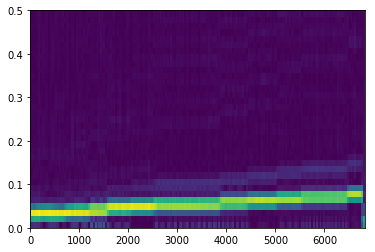

In [33]:
from scipy import signal
fint, tint, Zxxint = signal.stft(driving[:,1], 1., nperseg=70, detrend='constant')
plt.pcolormesh(tint, fint, np.abs(Zxxint))


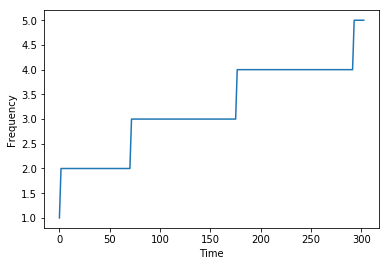

In [42]:
plt.plot(np.arange(0., Zxxint.shape[1], 1)[:-5]*35/22., np.argmax(np.abs(Zxxint), axis=0)[:-5])
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()
